In [ ]:
#ML Assignment1: 201924624 Nemekhbayar Nomin
#Part0 
#Installing the dataset and libraries

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [217]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets 
  
# metadata 
print('y: ', X) 
  
# variable information 
print(dry_bean.variables) 


y:          Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0      28395    610.291       208.178117       173.888747     1.197191   
1      28734    638.018       200.524796       182.734419     1.097356   
2      29380    624.110       212.826130       175.931143     1.209713   
3      30008    645.884       210.557999       182.516516     1.153638   
4      30140    620.134       201.847882       190.279279     1.060798   
...      ...        ...              ...              ...          ...   
13606  42097    759.696       288.721612       185.944705     1.552728   
13607  42101    757.499       281.576392       190.713136     1.476439   
13608  42139    759.321       281.539928       191.187979     1.472582   
13609  42147    763.779       283.382636       190.275731     1.489326   
13610  42159    772.237       295.142741       182.204716     1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0          0.549812       

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
#Part1 
#Data preprocessing

In [220]:
#Convert the training and validation dataset into Pandas DataFrame
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_x.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [222]:
df_y.sample(5)

,Class
9221,SIRA
2817,BARBUNYA
8141,SIRA
1082,SEKER
8251,SIRA


In [223]:
#Check for missing data
df_x.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [224]:
#Merge 'MajorAxisLength' and 'MinorAxisLength' into one column and drop them for the purpose of reducing features

df_x['AxisLengthDiff'] = df_x['MajorAxisLength'] - df_x['MinorAxisLength']
df_x = df_x.drop(columns=['MajorAxisLength', 'MinorAxisLength'])
df_x.head()

,Area,Perimeter,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,AxisLengthDiff
0,28395,610.291,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,34.289370
1,28734,638.018,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,17.790376
2,29380,624.110,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,36.894987
3,30008,645.884,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,28.041483
4,30140,620.134,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,11.568603


In [225]:
#Reduced the 4 features ('ShapeFactor1, 2, 3, 4') into one for less dimensionality
#using Principal Component Analysis
#I have tried evaluating the model without lowering 4 features into 1 feature in case to see, if it'd perform better
#but actually it showed 0.02 less accuracy or no difference in some models
#so, in favor of less computation cost, lower dimensions, 
from sklearn.decomposition import PCA
n_components=1
pca = PCA(n_components=1)
shape_factor = pca.fit_transform(df_x.iloc[:, 12:16])

df_x['ShapeFactor'] = shape_factor
df = df_x.drop(columns=['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'])
df.head()

,Area,Perimeter,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,AxisLengthDiff,ShapeFactor
0,28395,610.291,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,34.289370,-83.581980
1,28734,638.018,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,17.790376,-100.081073
2,29380,624.110,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,36.894987,-80.976353
3,30008,645.884,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,28.041483,-89.829902
4,30140,620.134,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,11.568603,-106.302888


In [226]:
#Normalize the data because higher values in 'Area' could weight more in model than other values in equallay important features

from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
standardized_df = pd.DataFrame(std.fit_transform(df), columns=df.columns)
standardized_df.head()

,Area,Perimeter,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,AxisLengthDiff,ShapeFactor
0,-0.840749,-1.143319,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,-1.526264,-1.526266
1,-0.829188,-1.013924,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,-1.827548,-1.827551
2,-0.807157,-1.078829,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,-1.478684,-1.478685
3,-0.785741,-0.977215,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,-1.640355,-1.640357
4,-0.781239,-1.097384,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,-1.941162,-1.941166


In [239]:

X = standardized_df
y = df_y
print(X.shape)
print(y.shape)

(13611, 12)
(13611, 1)


In [240]:
#accessing the number of classes data to be classified into
y.nunique()

Class    7
dtype: int64

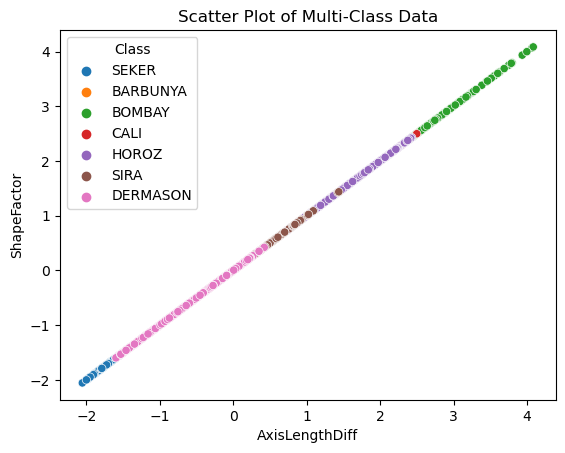

In [259]:
#Scatter plot using 'AxisLengthDiff' and 'ShapeFactor'
area_values = X['AxisLengthDiff'].values
shape_factor_values = X['ShapeFactor'].values

#result shows that the 2 features have linear relation
sns.scatterplot(x=area_values, y=shape_factor_values, hue=y['Class'])
plt.xlabel('AxisLengthDiff')
plt.ylabel('ShapeFactor')
plt.title('Scatter Plot of Multi-Class Data')
plt.show()

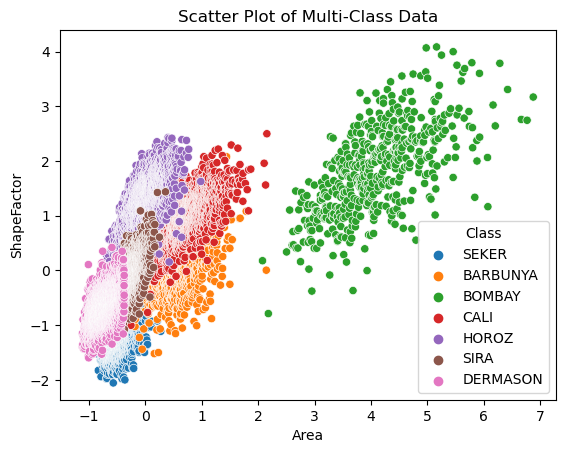

In [257]:
#Scatter plot using 'Area' and 'ShapeFactor'
area_values = X['Area'].values
shape_factor_values = X['ShapeFactor'].values


sns.scatterplot(x=area_values, y=shape_factor_values, hue=y['Class'])
plt.xlabel('Area')
plt.ylabel('ShapeFactor')
plt.title('Scatter Plot of Multi-Class Data')
plt.show()

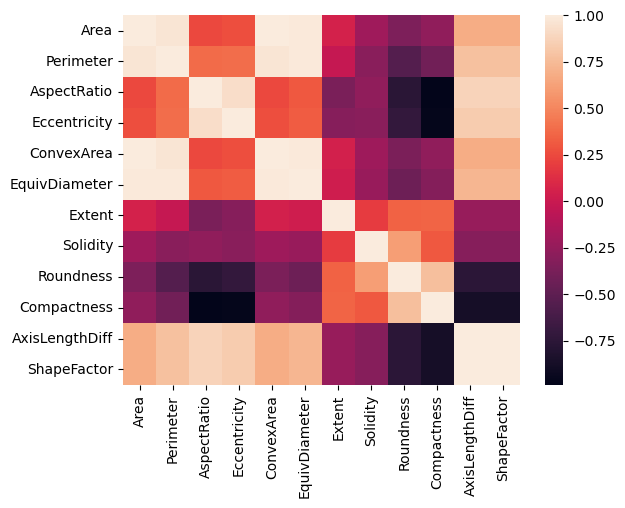

In [230]:
#Covarience matrix to see the varience disturbance between the features
x_mean = X.mean()
x_std = X.std()

z = (X - x_mean) / x_std
c = z.cov()
sns.heatmap(c)
plt.show()

In [124]:
#Part2 
#Model training and evaluation

In [241]:
#importing the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#models
tree = DecisionTreeClassifier()
gauss = GaussianNB()
random = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=7)
reg = LogisticRegression()

#voting classifier
voting = VotingClassifier(
    estimators=[('tree', tree), ('gauss', gauss), ('random', random), ('knn', knn), ('reg', reg)],
    voting='hard' 
)

#splitting the data into separate training and validation dataset using train_test_split()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training and evaluating the VotingClassifier()
voting.fit(x_train, y_train)
y_pred = voting.predict(x_test)
print(accuracy_score(y_test, y_pred))


/Users/nemekhbayarnomin/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nemekhbayarnomin/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/nemekhbayarnomin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

0.9221446933529196


In [199]:
#just checking to see if their size matches
print(y_test.shape, pred.shape)

(2723, 1) (2723,)


In [242]:
#model I've chosen for this dataset deemed to be suitable is KNeighborsClassifier and accuracy scoring method
#because the type of plant will fall close to those who has similar features and 'k' neighbots are known which means we can use this supervised learning 

knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(x_train, y_train) 
  
pred = knn.predict(x_test)

print(f'KNeighborsClassifier: pred={accuracy_score(y_test, pred)}')



KNeighborsClassifier: pred=0.9203084832904884


/Users/nemekhbayarnomin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [264]:
#Get report showing classification metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.91      0.95      0.93       317
    DERMASON       0.90      0.91      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.85      0.87      0.86       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

